# Custom cam profile

This notebook demonstrates how to construct a custom cam profile (that is, not a section of a longer BP signal) and generate a cam from it using the Python API.

In [1]:
import bpwave as bp
import cam_bpw_sim as bps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_peaks1 = 6
n_peaks2 = 4
fs = 1000

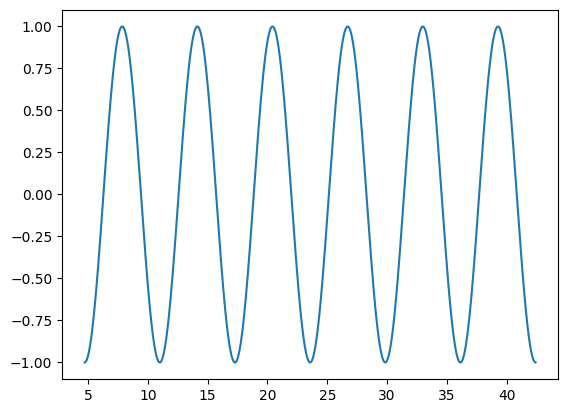

In [3]:
theta1 = np.linspace(np.pi * 1.5, (n_peaks1 * 2 + 1.5) * np.pi, n_peaks1 * fs)
sin1 = np.sin(theta1)
plt.plot(theta1, sin1)

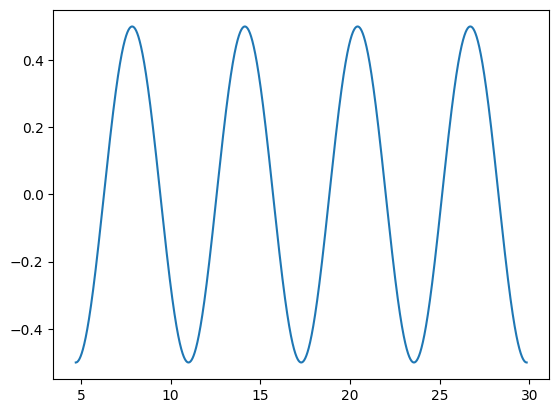

In [4]:
theta2 = np.linspace(np.pi * 1.5, (n_peaks2 * 2 + 1.5) * np.pi, n_peaks1 * fs)
sin2 = np.sin(theta2) * 0.5
plt.plot(theta2, sin2)

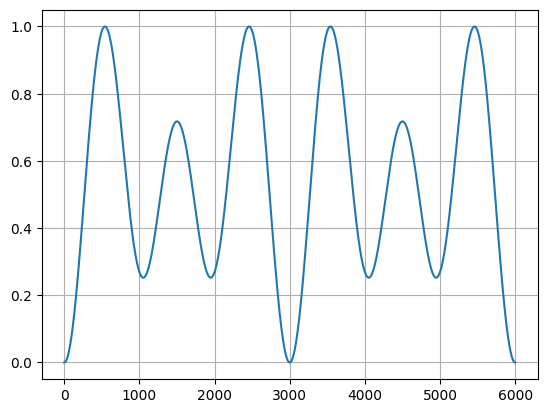

In [5]:
y = bps.signal.norm01(sin1 + sin2)
plt.plot(y)
plt.grid()

<Axes: xlabel='$t$ [s]', ylabel='$y$ [rel]'>

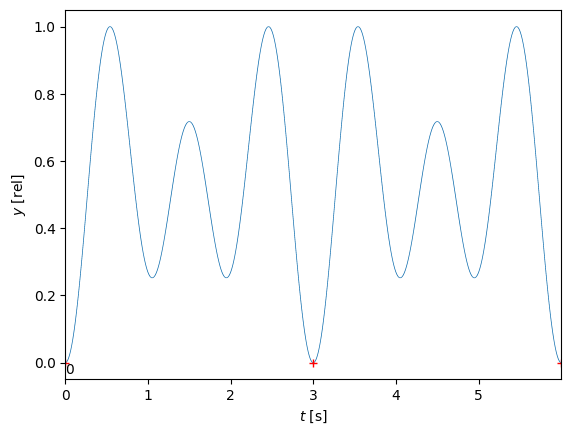

In [6]:
signal = bp.Signal(y=y, fs=fs)
signal.chpoints = bps.signal.LocMinDetector(order=fs)(signal).chpoints
signal.meta.update(dict(sin1="6 peaks", sin2="4 peaks"))
signal.plot(legend="off")

In [9]:
signal_name = "6SIN4SIN"
bps.app.add_cam_signal(signal, signal_name, force=False)

PosixPath('prep_signal/6SIN4SIN.camsig.hdf5')

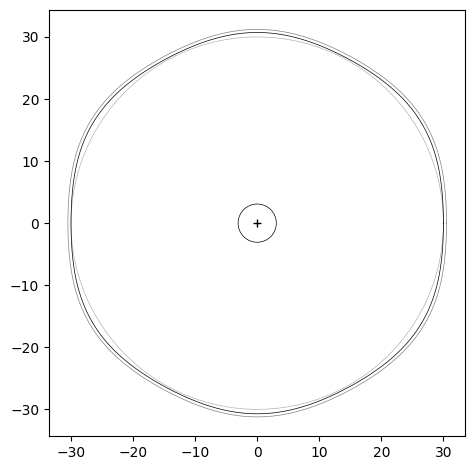

STL started


Geometries in cache: 43
Geometry cache size in bytes: 8160960
CGAL Polyhedrons in cache: 4
CGAL cache size in bytes: 82057776
Total rendering time: 0:02:07.328
   Top level object is a 3D object:
   Simple:        yes
   Vertices:    22030
   Halfedges:   85196
   Edges:       42598
   Halffacets:  41188
   Facets:      20594
   Volumes:         2


STL ready


PosixPath('cam/6SIN4SIN/d616r3000a100rf50/SC.1.1/6SIN4SIN_d616r3000a100rf50.cam.stl')

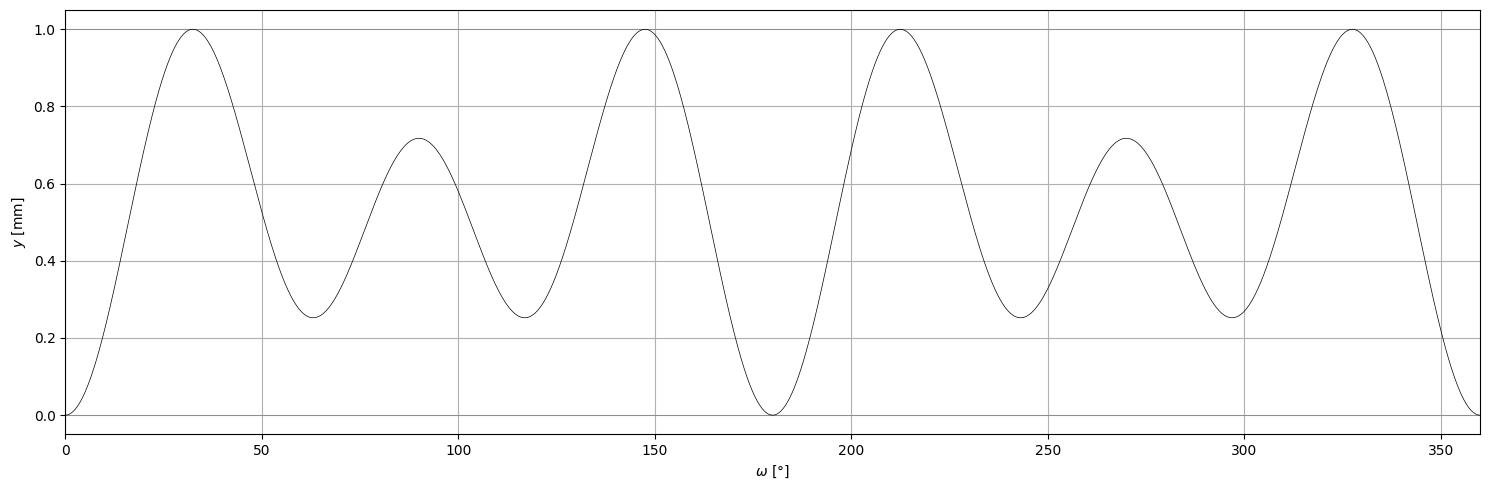

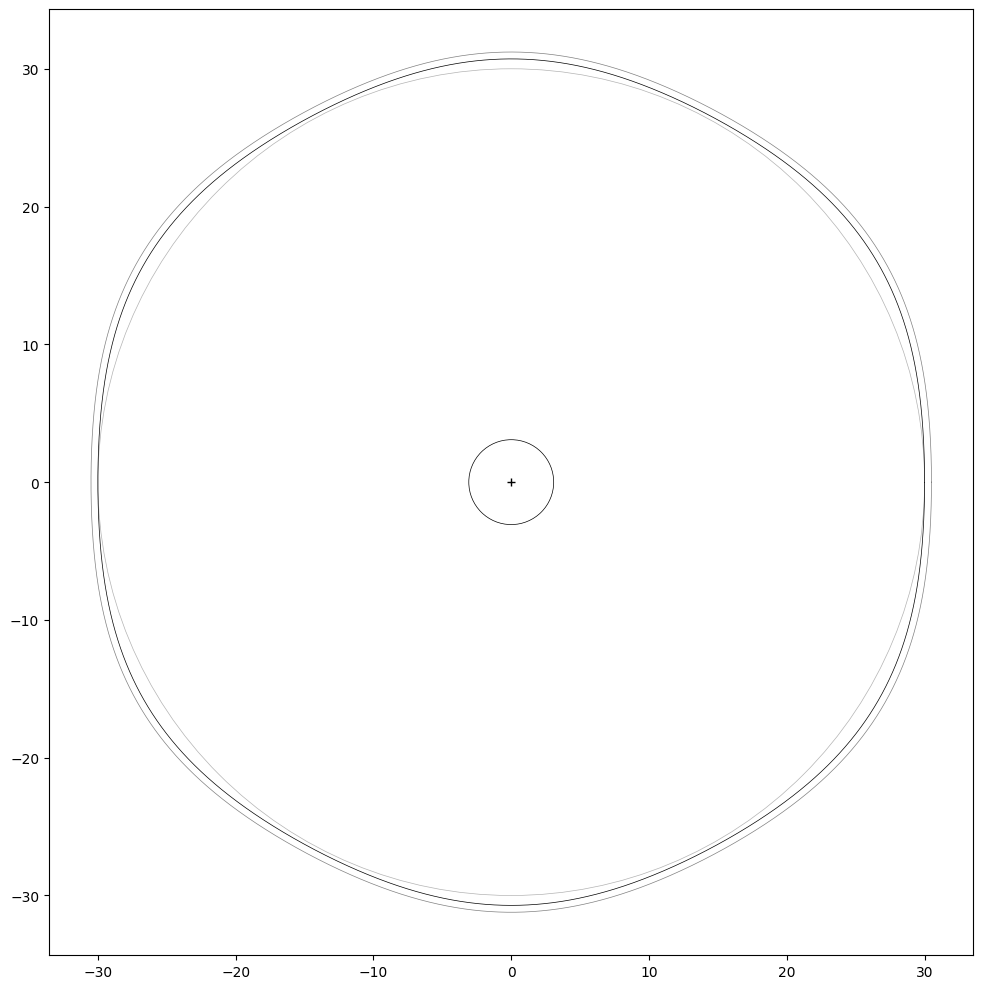

In [8]:
bps.app.generate_cam(
    bps.cam.CamParams(
        name=signal_name,
        amplitude=1.0,
        r=30.0,
        r_rim=29.0,
        r_follower=0.5,
        d_shaft=6.16,
    ),
    ask_continue=lambda: input("Continue? [y/n]") == "y",
    force=False,
    on_stl_started=lambda: print("STL started"),
    on_stl_finished=lambda: print("STL ready"),
)